In [286]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [287]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
from pypalettes import get_hex
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [288]:
data = pd.read_csv("../data/breast_cancer_dataset.csv")
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [289]:
data.shape

(569, 33)

# Describe

In [290]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [291]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [292]:
data.describe(include=['O'])

,diagnosis
count,569
unique,2
top,B
freq,357


In [293]:
data.value_counts(subset=['diagnosis'])

diagnosis
B            357
M            212
Name: count, dtype: int64

# Target Dummies

In [294]:
data['diagnosis'] = data['diagnosis'].map({'B':0, 'M':1})
data['diagnosis'] = data['diagnosis'].astype('category',copy=False)

# Cleaning

In [295]:
import missingno as msno

<Axes: >

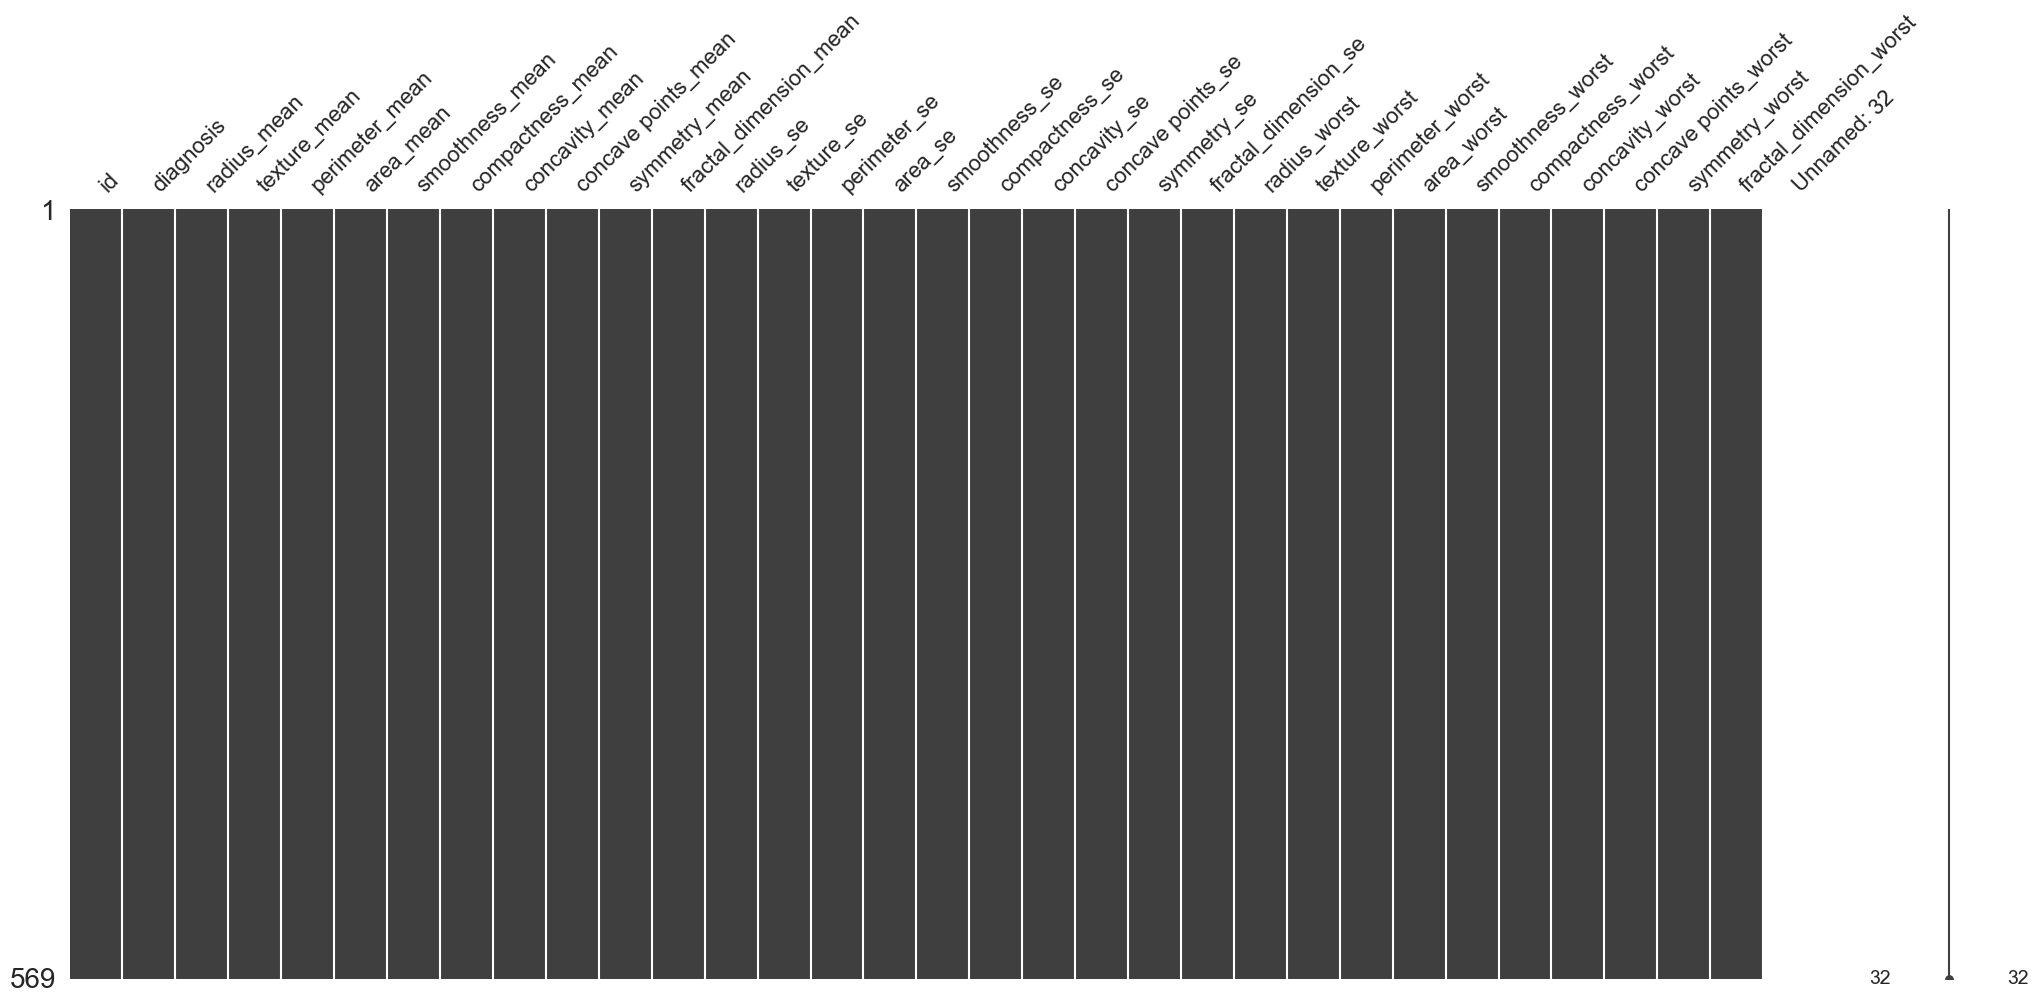

In [296]:
msno.matrix(data)

In [297]:
# drop id and empty column
data = data.drop(['Unnamed: 32', "id"], axis=1)

In [298]:
from common import null_table

In [299]:
null_table_train = null_table(data)

null_table_train.sort_values(
    by='Percentage', 
    ascending=False
)

,Columns,Null Count,Percentage
0,diagnosis,0,0.0
1,radius_mean,0,0.0
2,texture_mean,0,0.0
3,perimeter_mean,0,0.0
4,area_mean,0,0.0
5,smoothness_mean,0,0.0
6,compactness_mean,0,0.0
7,concavity_mean,0,0.0
8,concave points_mean,0,0.0
9,symmetry_mean,0,0.0


# Just Keep Mean Columns

In [300]:
features_mean= list(data.columns[1:11])
features_se= list(data.columns[11:20])
features_worst=list(data.columns[21:31])

category = data['diagnosis']
data = data[features_mean]
data['diagnosis'] = category

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   radius_mean             569 non-null    float64 
 1   texture_mean            569 non-null    float64 
 2   perimeter_mean          569 non-null    float64 
 3   area_mean               569 non-null    float64 
 4   smoothness_mean         569 non-null    float64 
 5   compactness_mean        569 non-null    float64 
 6   concavity_mean          569 non-null    float64 
 7   concave points_mean     569 non-null    float64 
 8   symmetry_mean           569 non-null    float64 
 9   fractal_dimension_mean  569 non-null    float64 
 10  diagnosis               569 non-null    category
dtypes: category(1), float64(10)
memory usage: 45.3 KB


# Correlation

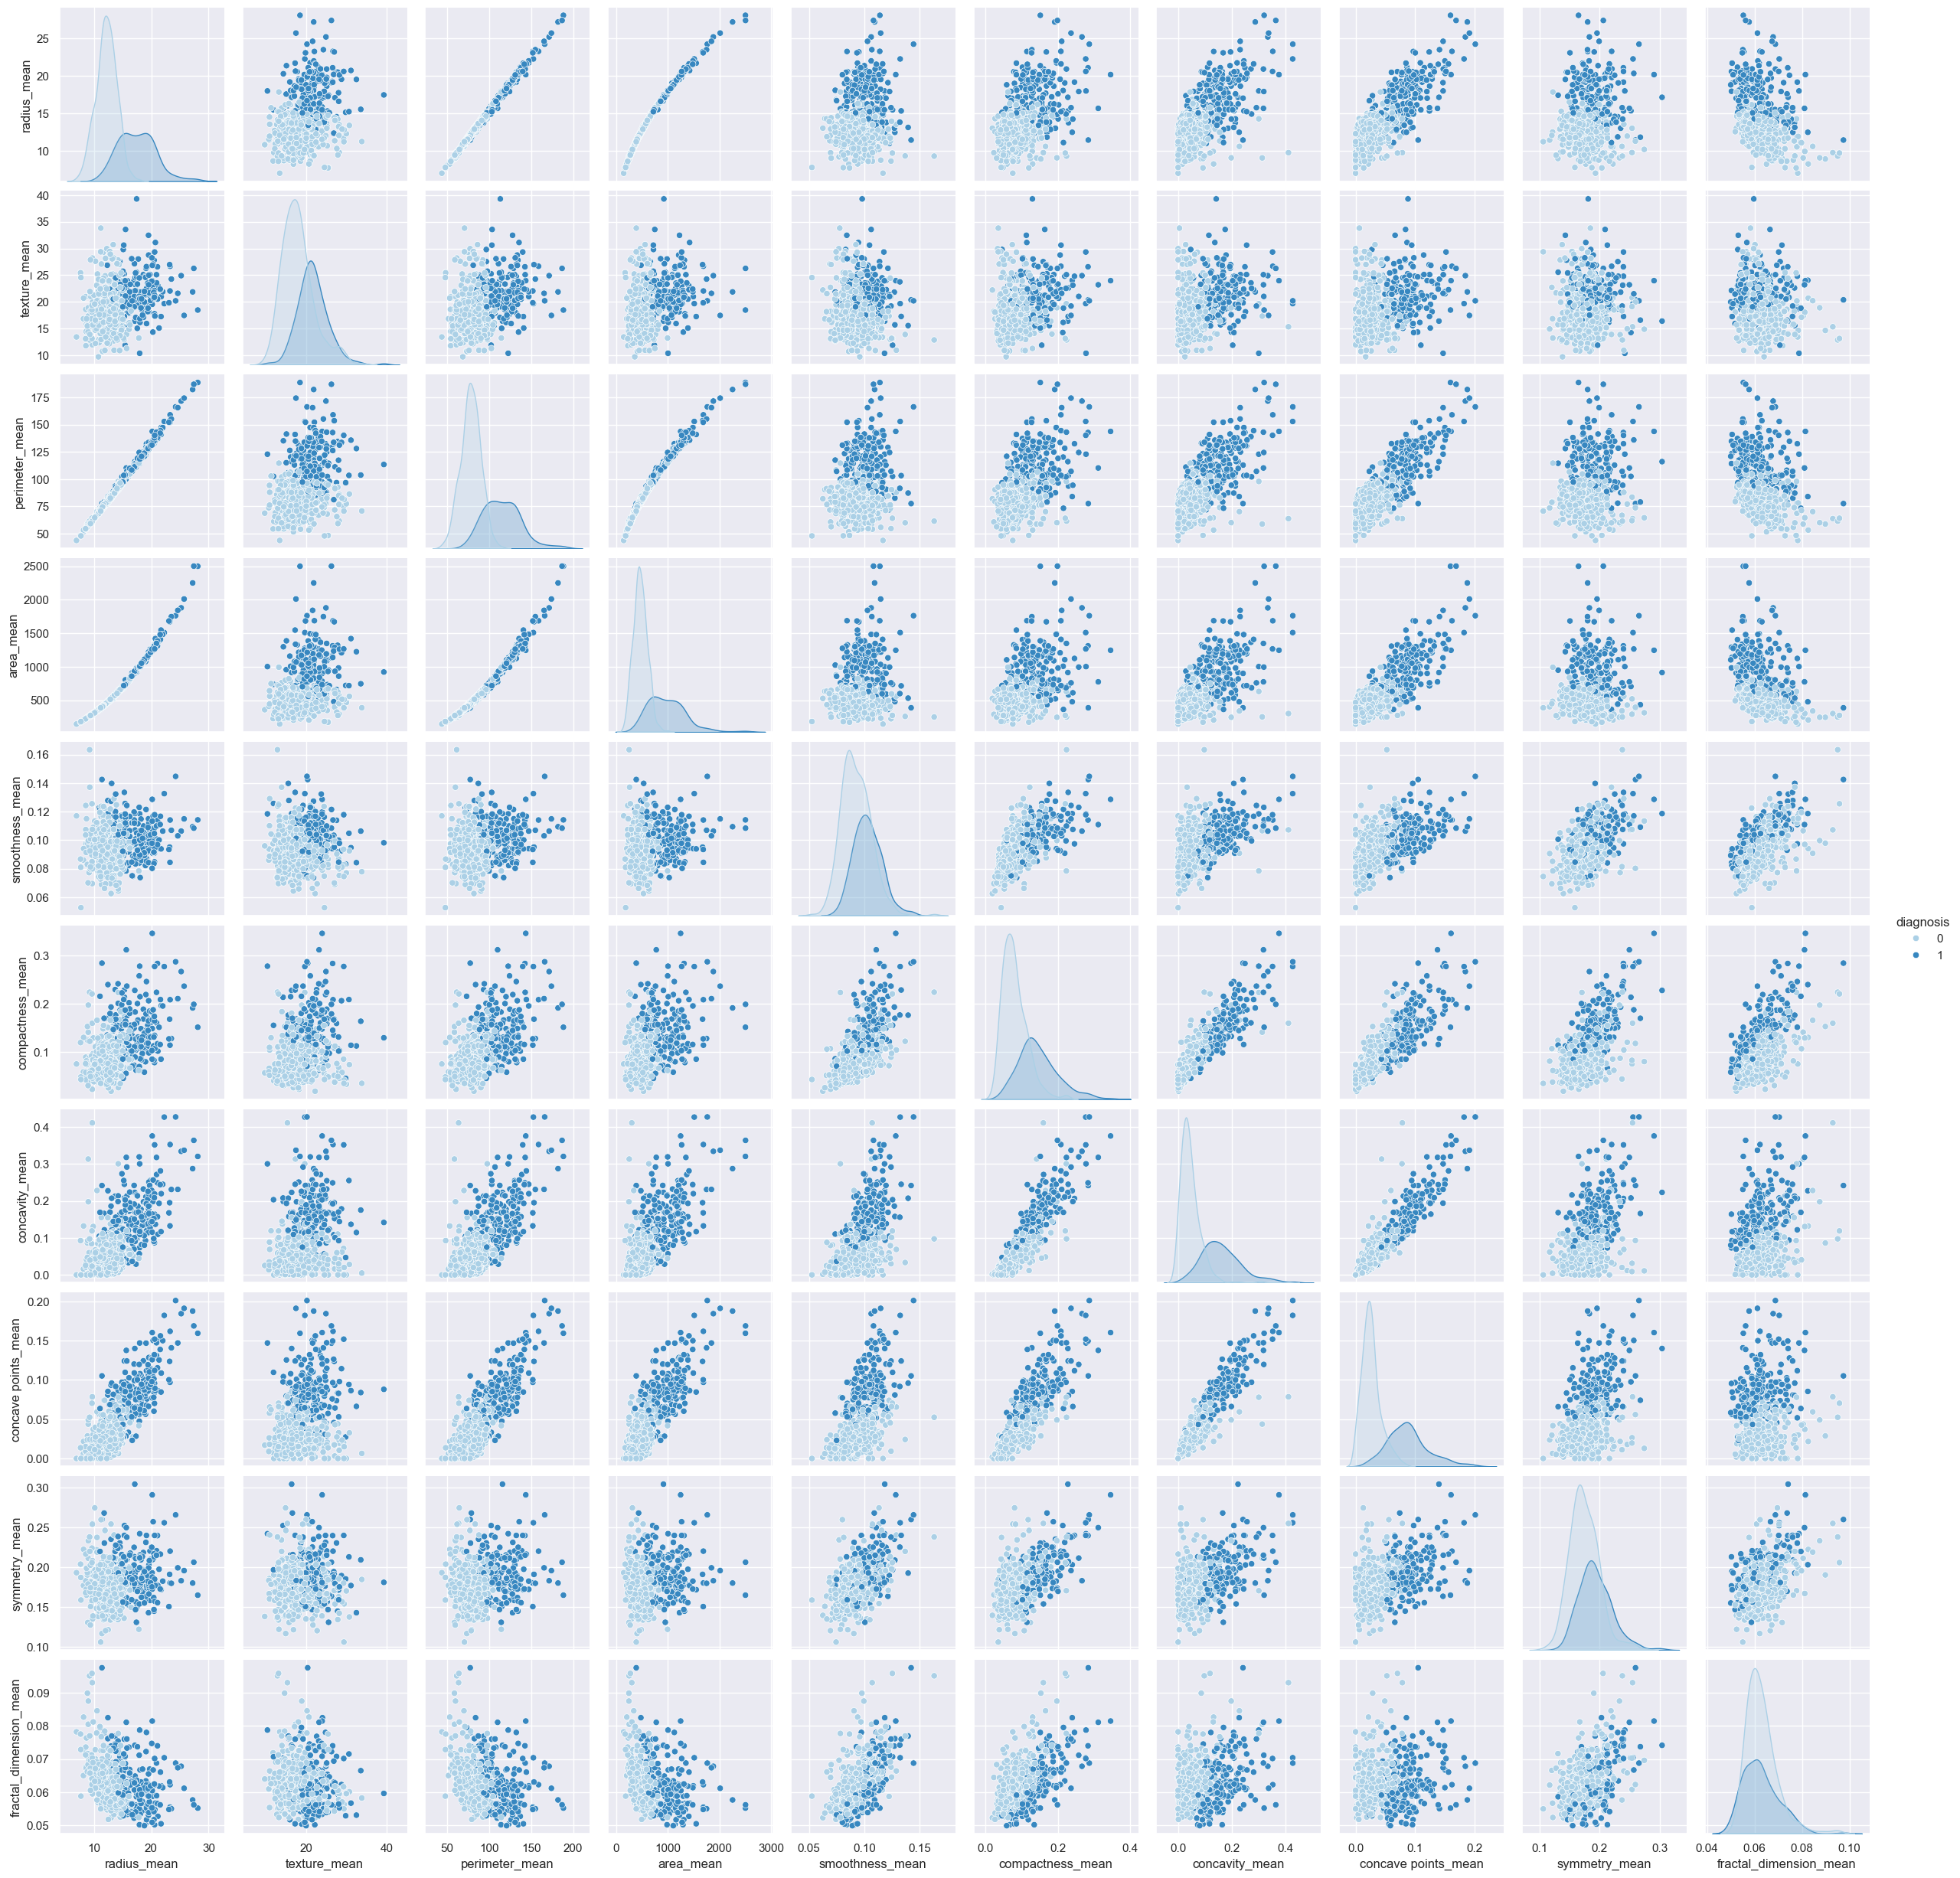

In [301]:
# pairplot for mean columns
sns.pairplot(data, hue = 'diagnosis', palette='Blues')

In [302]:
from common import corr_against_category_target

In [303]:
data_corr = corr_against_category_target(data, 'diagnosis')

In [304]:
# Define the correlation threshold
correlation_threshold = 0.3  

# Filter columns based on the correlation threshold
filtered_columns = data_corr.query('abs(Correlation) > @correlation_threshold')
filtered_columns

,Numeric Variables,Correlation,P-Value
0,concave points_mean,0.776614,7.101150e-116
1,perimeter_mean,0.742636,8.436251e-101
2,radius_mean,0.730029,8.465941e-96
3,area_mean,0.708984,4.734564e-88
4,concavity_mean,0.696360,9.966556e-84
5,compactness_mean,0.596534,3.938263e-56
6,texture_mean,0.415185,4.058636e-25
7,smoothness_mean,0.358560,1.051850e-18
8,symmetry_mean,0.330499,5.733384e-16


In [305]:
category = data['diagnosis']
data = data[filtered_columns['Numeric Variables'].values]
data['diagnosis'] = category

data.shape

(569, 10)

# Skew Handling

In [306]:
data.skew(numeric_only=True)

concave points_mean    1.171180
perimeter_mean         0.990650
radius_mean            0.942380
area_mean              1.645732
concavity_mean         1.401180
compactness_mean       1.190123
texture_mean           0.650450
smoothness_mean        0.456324
symmetry_mean          0.725609
dtype: float64

In [307]:
from common import fix_skewness_yeojohnson

In [308]:
data = fix_skewness_yeojohnson(data, skew_threshold=0.5)
data.shape

(569, 10)

In [309]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   concave points_mean  569 non-null    float64 
 1   perimeter_mean       569 non-null    float64 
 2   radius_mean          569 non-null    float64 
 3   area_mean            569 non-null    float64 
 4   concavity_mean       569 non-null    float64 
 5   compactness_mean     569 non-null    float64 
 6   texture_mean         569 non-null    float64 
 7   smoothness_mean      569 non-null    float64 
 8   symmetry_mean        569 non-null    float64 
 9   diagnosis            569 non-null    category
dtypes: category(1), float64(9)
memory usage: 40.8 KB


# Group Differences

In [310]:
from common import draw_box_plots

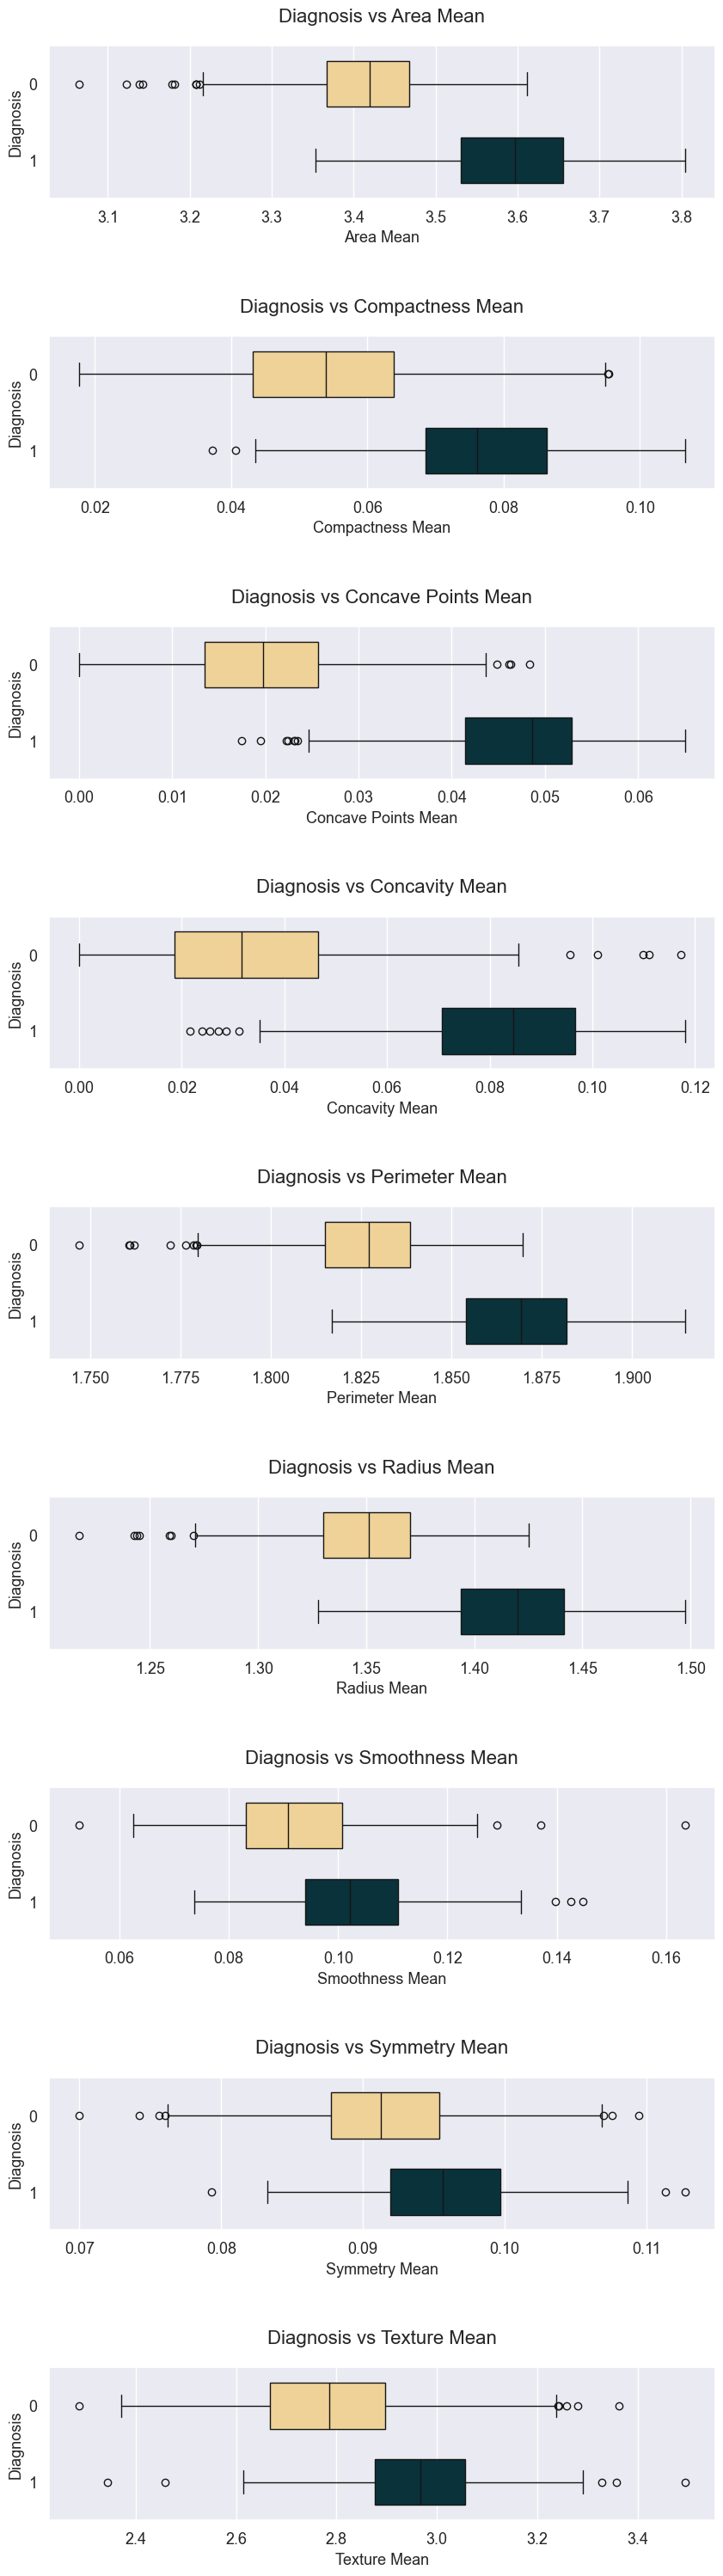

In [311]:
draw_box_plots(data, 'diagnosis', 10, 4)

# Training

20:22:46 | SUCCESS  | Start!
20:22:46 | DEBUG    | Getting Dataset!
20:22:47 | INFO     | Go Forth and Grid Search!
Fitting 5 folds for each of 40 candidates, totalling 200 fits
20:23:04 | INFO     | Best score        : 94.73%
20:23:04 | INFO     | Best parameters   : 
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
20:23:04 | INFO     | Predicting on Test Set
20:23:04 | INFO     | Evaluation on Test Set
20:23:04 | INFO     | Accuracy Score : 0.9298
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        72
           1       0.93      0.88      0.90        42

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



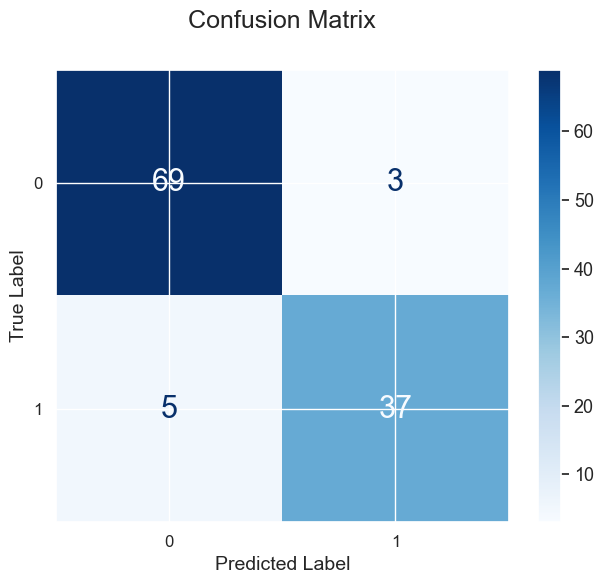

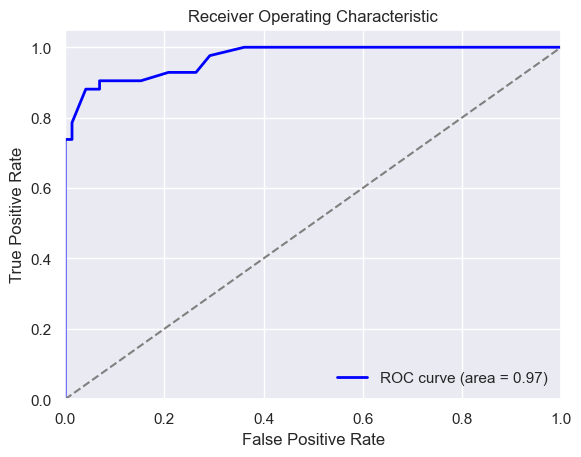

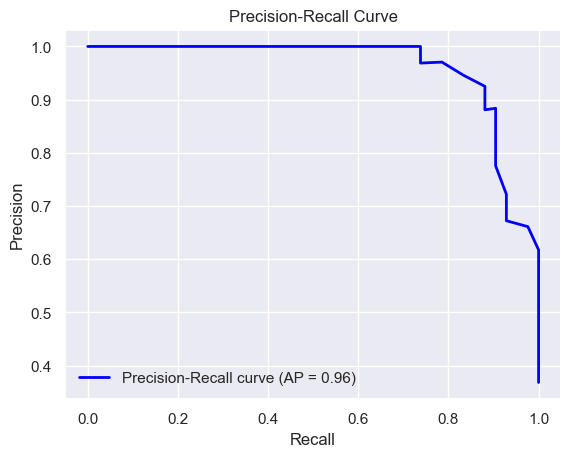

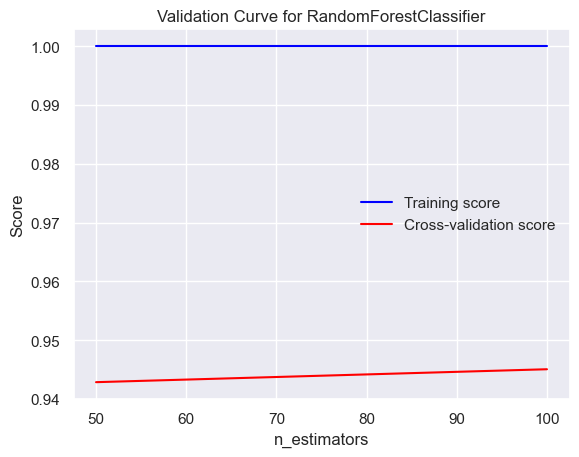

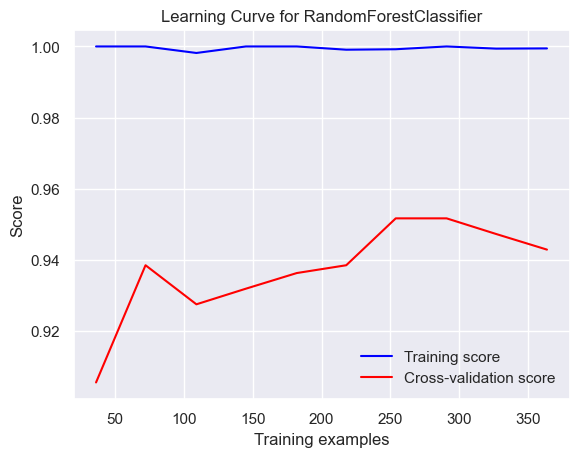

20:23:09 | SUCCESS  | Done!


In [312]:
from breast_cancer_train import main
bm = main()